## Exploratory data analysis 

In [5]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# improting the CSV data file 

data_01 = pd.read_csv('/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/train.csv')
data_02_c = data_01.copy()


In [3]:
data_02_c.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [4]:
# Get number of columns and rows in the data

num_rows, num_cols = data_02_c.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_cols}')

Number of rows: 54706
Number of columns: 14


In [5]:
# summary of the data types and non-null columns

print(data_02_c.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

In [8]:
# descrptive statistics for numerical columns

print(data_02_c.describe(include= 'all'))

             site_id    patient_id      image_id laterality   view  \
count   54706.000000  54706.000000  5.470600e+04      54706  54706   
unique           NaN           NaN           NaN          2      6   
top              NaN           NaN           NaN          R    MLO   
freq             NaN           NaN           NaN      27439  27903   
mean        1.460407  32698.865262  1.079386e+09        NaN    NaN   
std         0.498434  18893.861534  6.183269e+08        NaN    NaN   
min         1.000000      5.000000  6.849100e+04        NaN    NaN   
25%         1.000000  16481.000000  5.458153e+08        NaN    NaN   
50%         1.000000  32432.000000  1.082689e+09        NaN    NaN   
75%         2.000000  48999.000000  1.613228e+09        NaN    NaN   
max         2.000000  65534.000000  2.147472e+09        NaN    NaN   

                 age        cancer        biopsy      invasive        BIRADS  \
count   54669.000000  54706.000000  54706.000000  54706.000000  26286.000000   

In [10]:
# For categorical columns (if any)


categorical_cols = data_02_c.select_dtypes(include = ['object', 'category']).columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}': ")
    print(data_02_c[col].value_counts(dropna=False))


Unique values in 'laterality': 
laterality
R    27439
L    27267
Name: count, dtype: int64

Unique values in 'view': 
view
MLO    27903
CC     26765
AT        19
LM        10
ML         8
LMO        1
Name: count, dtype: int64

Unique values in 'density': 
density
NaN    25236
B      12651
C      12175
A       3105
D       1539
Name: count, dtype: int64


In [11]:
# Null values checkup 

# Total null values per column
null_counts = data_02_c.isnull().sum()

# Percentage of null values per column
null_percent = (data_02_c.isnull().sum() / len(data_02_c)) * 100

# Create a summary DataFrame
null_summary = pd.DataFrame({
    'Column': null_counts.index,
    'Null_Count': null_counts.values,
    'Null_Percent': null_percent.values
})

# Filter columns with missing values (if any)
null_summary = null_summary[null_summary['Null_Count'] > 0]

print("Null Value Summary:")
print(null_summary.sort_values('Null_Percent', ascending=False))

Null Value Summary:
     Column  Null_Count  Null_Percent
9    BIRADS       28420     51.950426
11  density       25236     46.130223
5       age          37      0.067634


/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_2629/4172437626.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=null_df, x='Column', y='Null_Percent', palette='viridis')


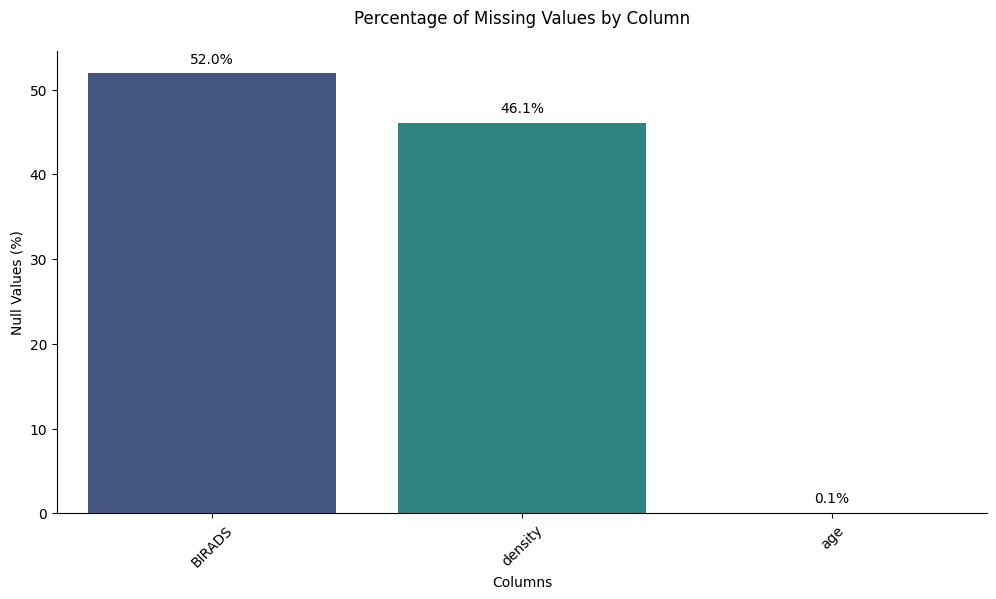

In [13]:
# Calculate null stats
null_counts = data_02_c.isnull().sum()
null_pct = (null_counts / len(data_02_c)) * 100
null_df = pd.DataFrame({'Column': null_counts.index, 'Null_Count': null_counts, 'Null_Percent': null_pct})
null_df = null_df[null_df['Null_Count'] > 0].sort_values('Null_Percent', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=null_df, x='Column', y='Null_Percent', palette='viridis')

# Annotate
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title("Percentage of Missing Values by Column", pad=20)
plt.xlabel("Columns")
plt.ylabel("Null Values (%)")
plt.xticks(rotation=45)
sns.despine()
plt.show()

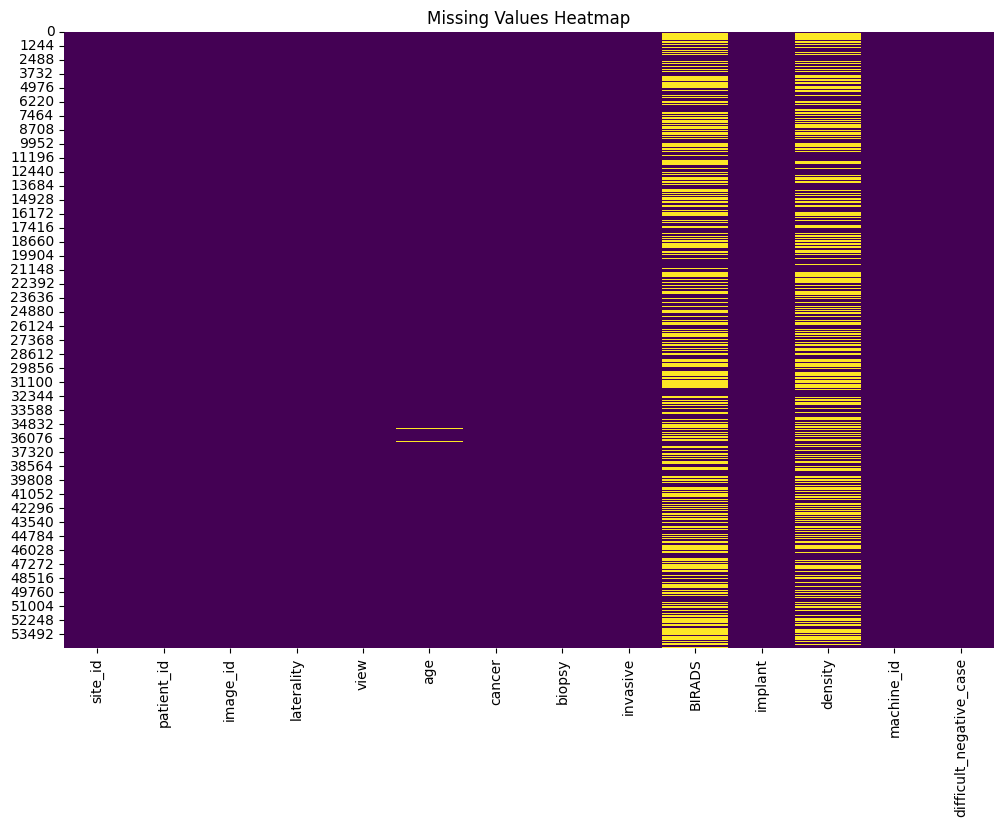

In [14]:
# Visualize missing values as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_02_c.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_2629/2240341467.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=class_df, x='Class', y='Count', palette=['#4ECDC4', '#FF6B6B'])


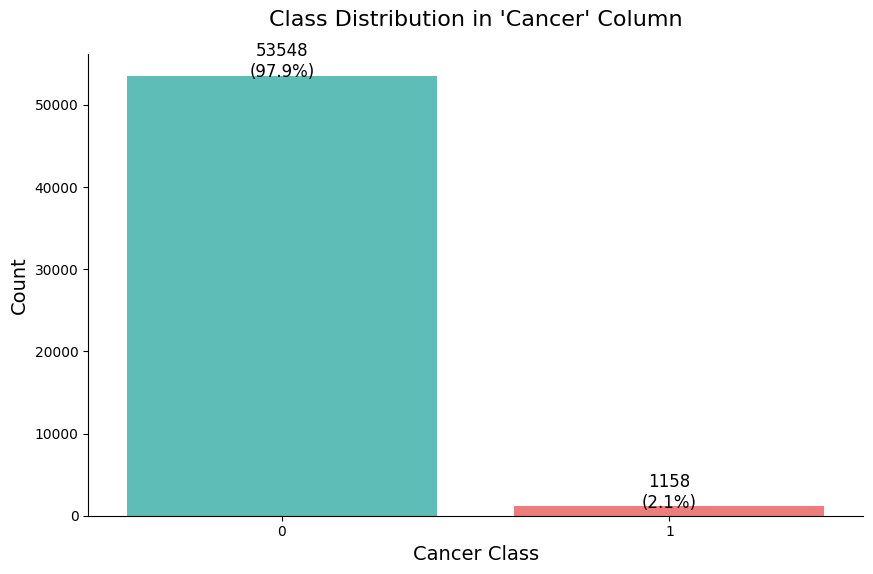

In [17]:
# Check whether the class imblance in cancer column



# Assuming 'cancer' is your target column (e.g., values: 'Malignant', 'Benign')
class_counts = data_02_c['cancer'].value_counts()
class_pct = data_02_c['cancer'].value_counts(normalize=True) * 100

# Create summary DataFrame
class_df = pd.DataFrame({
    'Class': class_counts.index,
    'Count': class_counts.values,
    'Percentage': class_pct.values
})

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=class_df, x='Class', y='Count', palette=['#4ECDC4', '#FF6B6B'])

# Annotate bars with counts and percentages
for i, p in enumerate(ax.patches):
    ax.annotate(
        f"{class_df['Count'][i]}\n({class_df['Percentage'][i]:.1f}%)",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12
    )

plt.title("Class Distribution in 'Cancer' Column", pad=20, fontsize=16)
plt.xlabel("Cancer Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
sns.despine()
plt.show()

In [23]:
# check weather the cancer patients under the 40 years old

# Filter cancer patients under 30
young_cancer_patients = data_02_c[(data_02_c['cancer'] == 1) & (data_02_c['age'] < 40)]

# Count the number of such patients
count = len(young_cancer_patients)
print(f"Number of cancer patients under 40: {count}")

# Optional: Calculate percentage of all cancer patients
total_cancer_patients = len(data_02_c[data_02_c['cancer'] == 1])
percentage = (count / total_cancer_patients) * 100
print(f"Percentage of cancer patients under 40: {percentage:.2f}%")

Number of cancer patients under 40: 5
Percentage of cancer patients under 40: 0.43%


Cancer patients under 40: 5 (0.4% of all cancer patients)


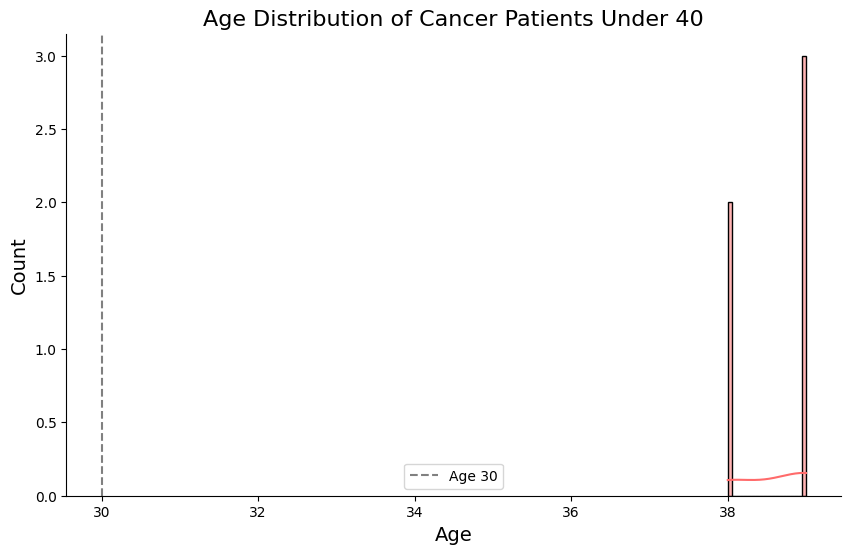

In [27]:
# Filter cancer patients under 40
cancer_under_40 = data_02_c[(data_02_c['cancer'] == 1) & (data_02_c['age'] < 40)]

# Count patients
count = len(cancer_under_40)
total_cancer = len(data_02_c[data_02_c['cancer'] == 1])
percentage = (count / total_cancer) * 100

print(f"Cancer patients under 40: {count} ({percentage:.1f}% of all cancer patients)")



plt.figure(figsize=(10, 6))
sns.histplot(data=cancer_under_40, x='age', bins=20, kde=True, color='#FF6B6B')
plt.title('Age Distribution of Cancer Patients Under 40', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.axvline(x=30, color='gray', linestyle='--', label='Age 30')  # Highlight a threshold
plt.legend()
sns.despine()
plt.show()

Peak age zone: 63-68 (Count: 229)


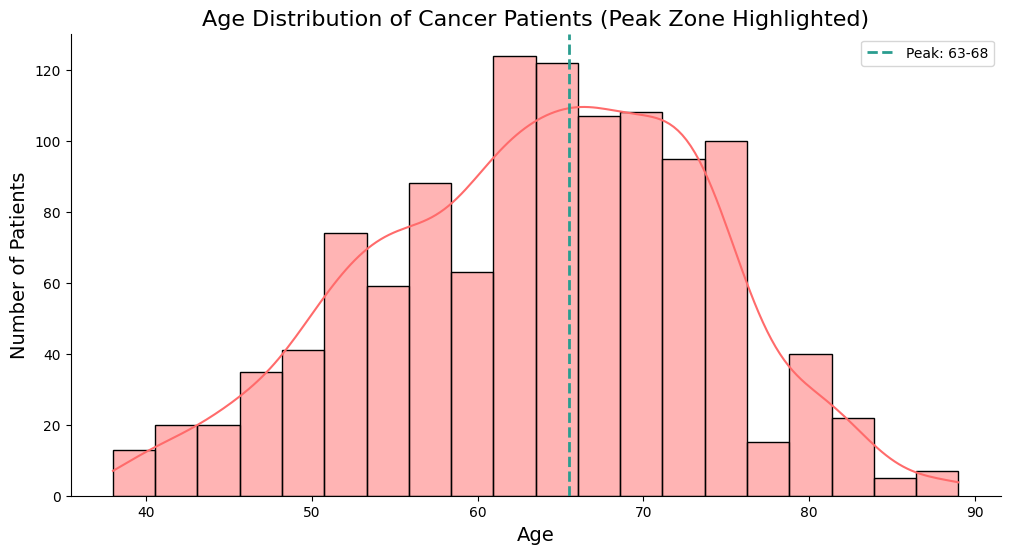

In [30]:
# Showing the largerst value of cancer patients have Age zone

# Filter cancer patients
cancer_patients = data_02_c[data_02_c['cancer'] == 1]

# Calculate age bins with highest counts - using integer bins
age_counts = cancer_patients['age'].value_counts(bins=10, sort=True)

# Convert bins to integer ranges
def format_bin(bin):
    return f"{int(bin.left)}-{int(bin.right)}"

peak_age_bin = age_counts.idxmax()
peak_count = age_counts.max()

# Get integer-formatted bin label
peak_age_label = format_bin(peak_age_bin)
print(f"Peak age zone: {peak_age_label} (Count: {peak_count})")

plt.figure(figsize=(12, 6))
ax = sns.histplot(cancer_patients['age'], bins=20, kde=True, color='#FF6B6B', edgecolor='black')

# Highlight peak age zone (using integer center)
peak_center = (int(peak_age_bin.left) + int(peak_age_bin.right)) / 2
ax.axvline(peak_center, color='#2A9D8F', linestyle='--', linewidth=2, 
          label=f'Peak: {peak_age_label}')

# Annotate peak with integer range
ax.annotate(
    f"Peak: {peak_age_label}\nCount: {peak_count}",
    xy=(peak_center, peak_count),
    xytext=(peak_center + 5, peak_count * 0.9),
    arrowprops=dict(arrowstyle='->', color='black'),
    fontsize=12
)

plt.title('Age Distribution of Cancer Patients (Peak Zone Highlighted)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.legend()
sns.despine()
plt.show()

Age Statistics:
Mean: 58.5, Median: 59.0, Std: 10.1

IQR Boundaries: [28.5, 88.5]
Potential Outliers (IQR method): 99
Potential Outliers (Z-score method): 99
Potential Outliers (Modified Z-score): 0


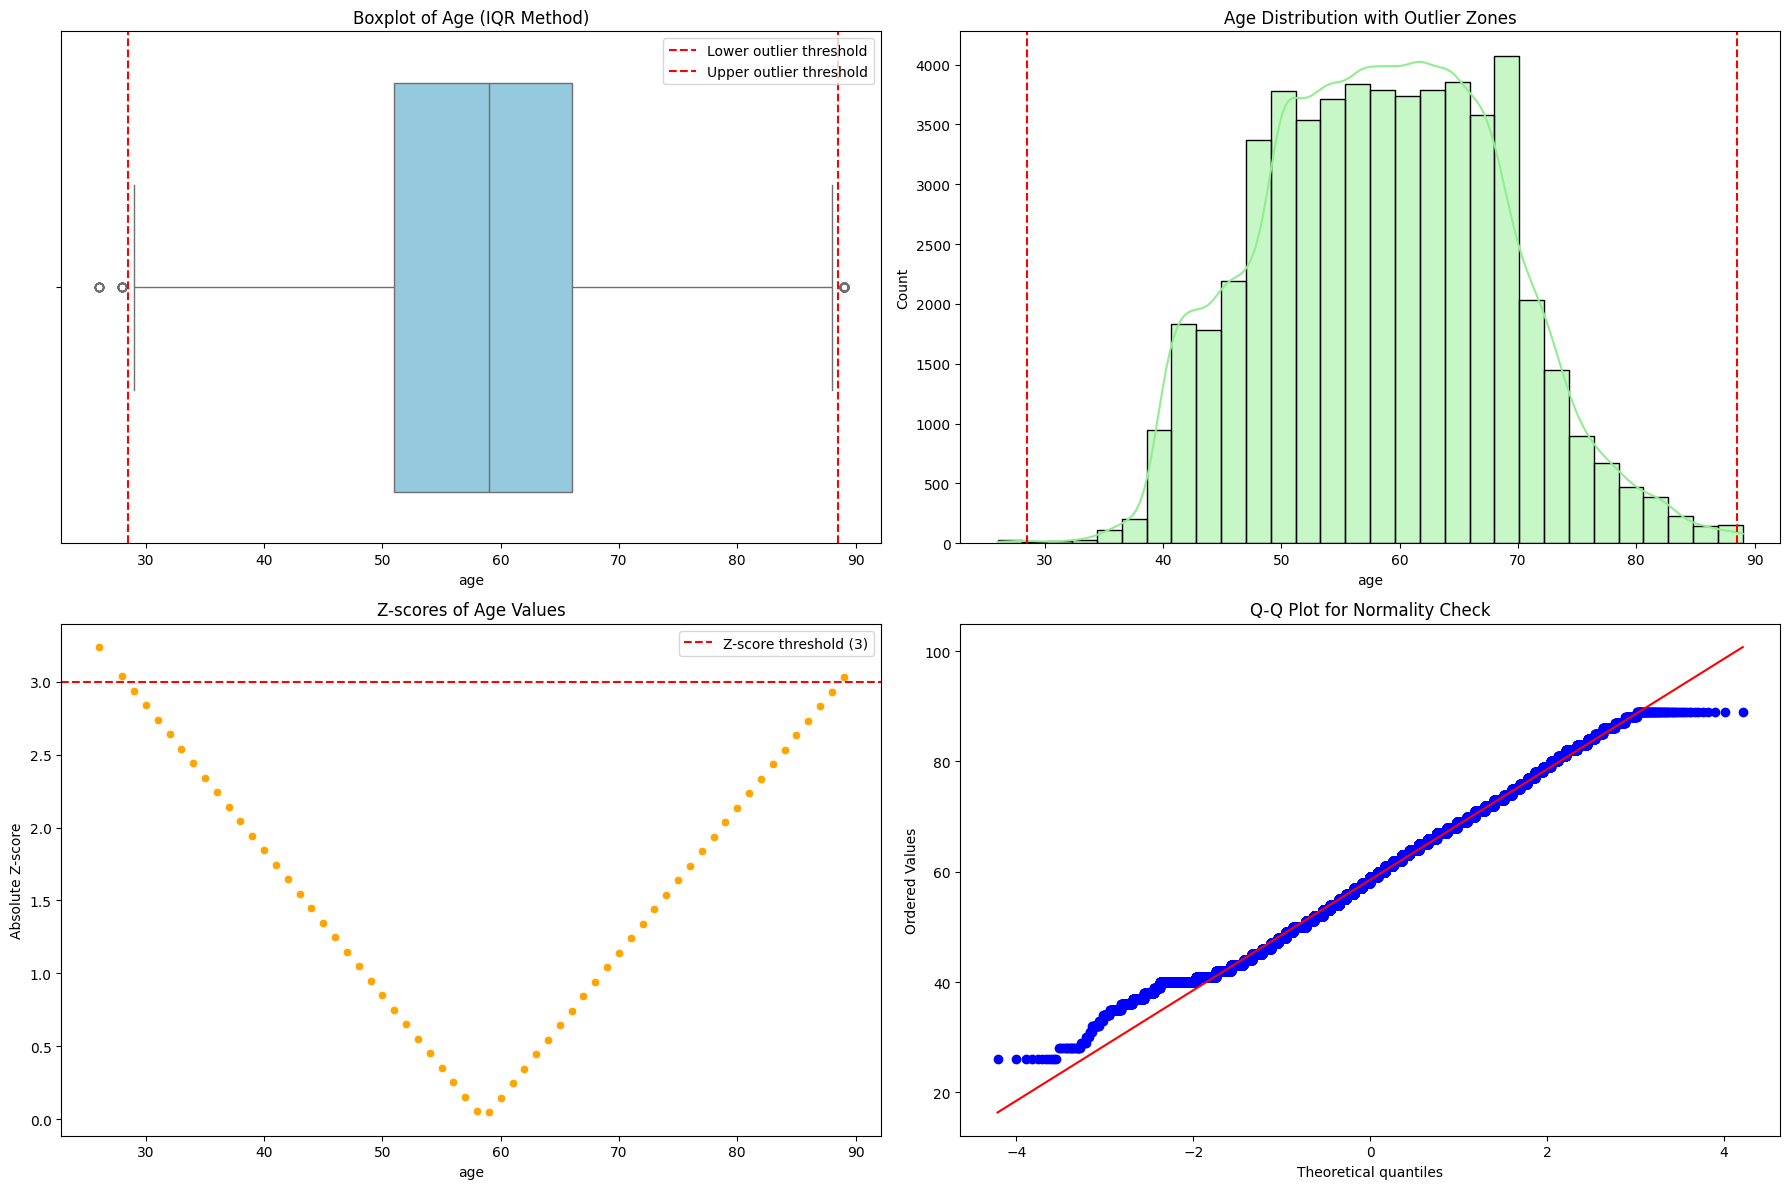


Sample Outlier Values:
age
89.0    70
28.0    18
26.0    11
Name: count, dtype: int64


In [10]:
import numpy as np
from scipy import stats as scipy_stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def detect_outliers(series):
    # Create a clean version without NAs for calculations
    clean_series = series.dropna()
    
    # Basic statistics
    summary_stats = {
        'mean': clean_series.mean(),
        'median': clean_series.median(),
        'std': clean_series.std(),
        'count': clean_series.count(),
        'missing': series.isna().sum()
    }
    
    # IQR Method (most common)
    Q1 = clean_series.quantile(0.25)
    Q3 = clean_series.quantile(0.75)
    IQR = Q3 - Q1
    iqr_low = Q1 - 1.5 * IQR
    iqr_high = Q3 + 1.5 * IQR
    
    # Z-score method (for normal distributions)
    z_scores = np.abs(scipy_stats.zscore(clean_series))
    z_threshold = 3
    z_outliers = clean_series[(z_scores > z_threshold)]
    
    # Modified Z-score (for non-normal distributions)
    median = np.median(clean_series)
    # Updated to use current scipy function name
    mad = scipy_stats.median_abs_deviation(clean_series, scale='normal')
    modified_z_scores = 0.6745 * (clean_series - median) / mad
    mod_z_outliers = clean_series[np.abs(modified_z_scores) > 3.5]
    
    # Combine results
    outliers = {
        'iqr_low': iqr_low,
        'iqr_high': iqr_high,
        'iqr_outliers': series[(series < iqr_low) | (series > iqr_high)],
        'z_outliers': z_outliers,
        'mod_z_outliers': mod_z_outliers,
        'stats': summary_stats
    }
    
    return outliers

# 2. Detect outliers
age_outliers = detect_outliers(data_02_c['age'])

# 3. Print summary
print(f"Age Statistics:\nMean: {age_outliers['stats']['mean']:.1f}, "
      f"Median: {age_outliers['stats']['median']:.1f}, "
      f"Std: {age_outliers['stats']['std']:.1f}")
print(f"\nIQR Boundaries: [{age_outliers['iqr_low']:.1f}, {age_outliers['iqr_high']:.1f}]")
print(f"Potential Outliers (IQR method): {len(age_outliers['iqr_outliers'])}")
print(f"Potential Outliers (Z-score method): {len(age_outliers['z_outliers'])}")
print(f"Potential Outliers (Modified Z-score): {len(age_outliers['mod_z_outliers'])}")

# 4. Visualize with multiple techniques
plt.figure(figsize=(18, 12))

# Boxplot
plt.subplot(2, 2, 1)
sns.boxplot(x=data_02_c['age'], color='skyblue')
plt.title('Boxplot of Age (IQR Method)')
plt.axvline(age_outliers['iqr_low'], color='red', linestyle='--', label='Lower outlier threshold')
plt.axvline(age_outliers['iqr_high'], color='red', linestyle='--', label='Upper outlier threshold')
plt.legend()

# Histogram with KDE
plt.subplot(2, 2, 2)
sns.histplot(data_02_c['age'], kde=True, color='lightgreen', bins=30)
plt.title('Age Distribution with Outlier Zones')
plt.axvline(age_outliers['iqr_low'], color='red', linestyle='--')
plt.axvline(age_outliers['iqr_high'], color='red', linestyle='--')

# Z-score visualization
plt.subplot(2, 2, 3)
clean_age = data_02_c['age'].dropna()
z_scores = np.abs(scipy_stats.zscore(clean_age))
sns.scatterplot(x=clean_age, y=z_scores, color='orange')
plt.axhline(y=3, color='red', linestyle='--', label='Z-score threshold (3)')
plt.title('Z-scores of Age Values')
plt.ylabel('Absolute Z-score')
plt.legend()

# QQ-plot for normality check
plt.subplot(2, 2, 4)
scipy_stats.probplot(clean_age, plot=plt)
plt.title('Q-Q Plot for Normality Check')

plt.tight_layout()
plt.show()

# 5. Show the actual outlier values
print("\nSample Outlier Values:")
print(data_02_c[data_02_c['age'].isin(age_outliers['iqr_outliers'])]['age'].value_counts().head(10))

# Pre-processing stage both CSV data image data (cleaning process)

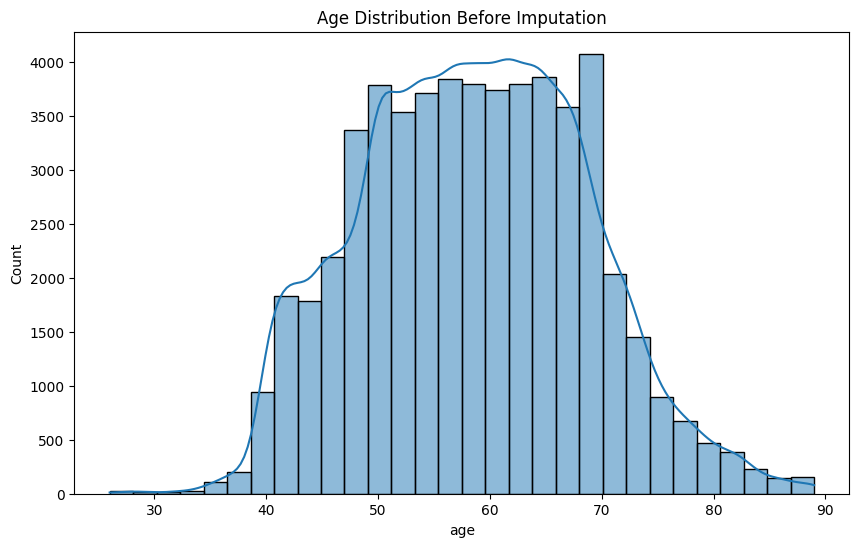

Using MICE imputation (multivariate approach)


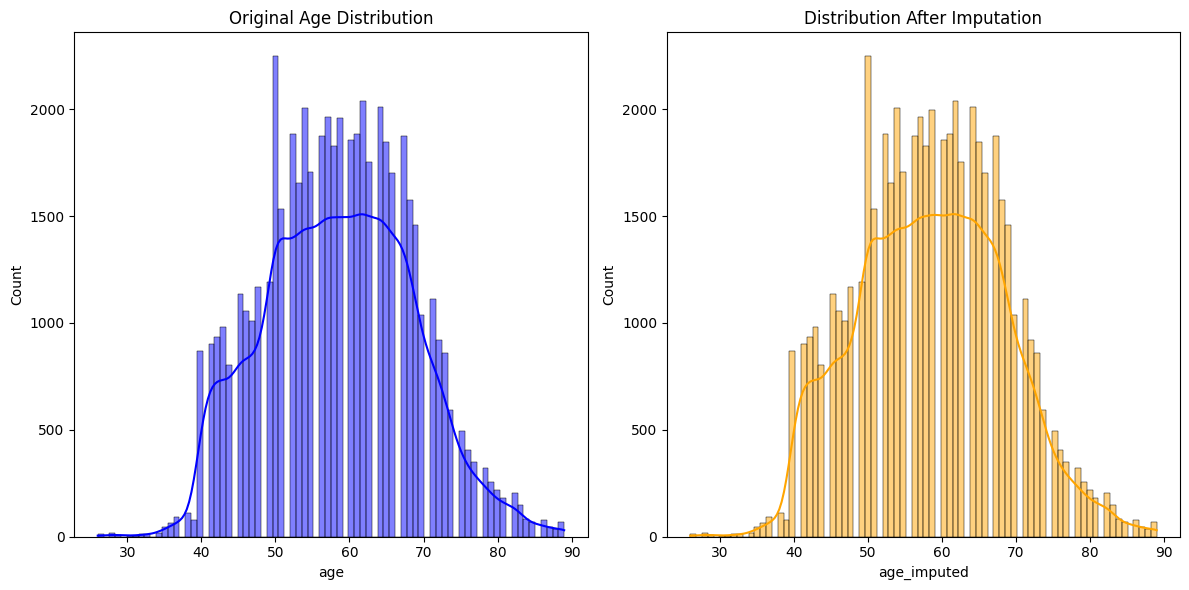


Statistics Comparison:
       Original Age   Imputed Age
count  54669.000000  54706.000000
mean      58.543928     58.544236
std       10.050884     10.047491
min       26.000000     26.000000
25%       51.000000     51.000000
50%       59.000000     59.000000
75%       66.000000     66.000000
max       89.000000     89.000000


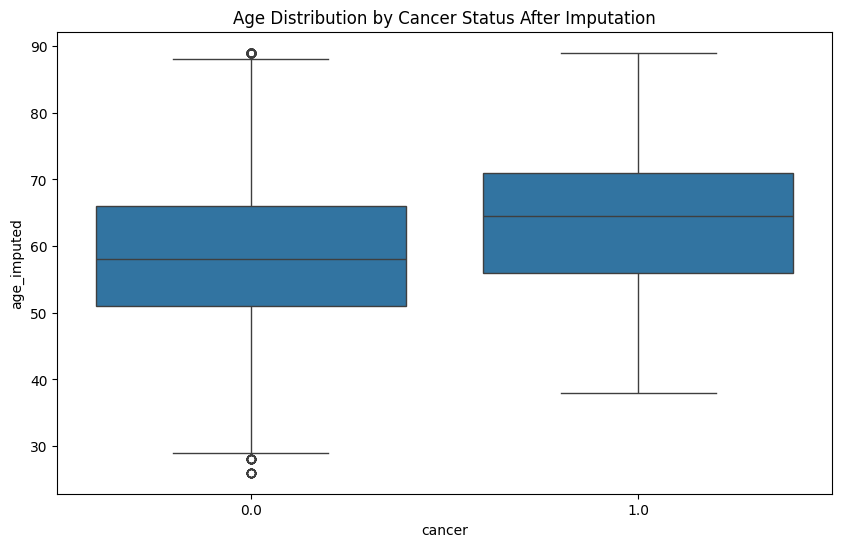

In [11]:
# impute the values for the Age column 

import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt



# 1. First check the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data_02_c['age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution Before Imputation')
plt.show()

# 2. Create missing value flag
data_02_c['age_missing'] = data_02_c['age'].isnull().astype(int)

# 3. Choose imputation method based on data characteristics
if data_02_c['age'].skew() > 1:  # If heavily skewed
    # Median imputation for skewed data
    imputed_value = data_02_c['age'].median()
    print(f"Using median imputation (value = {imputed_value:.1f} years)")
    data_02_c['age_imputed'] = data_02_c['age'].fillna(imputed_value)
else:
    # MICE imputation for normal-ish distributions
    print("Using MICE imputation (multivariate approach)")
    
    # Select predictive features (adjust based on your dataset)
    features = ['cancer', 'biopsy', 'invasive']  # Add other relevant columns
    
    # Initialize MICE imputer
    imputer = IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=100),
        max_iter=10,
        random_state=42
    )
    
    # Fit and transform
    data_02_c[['age_imputed'] + features] = imputer.fit_transform(data_02_c[['age'] + features])
    
    # Round to whole numbers for age
    data_02_c['age_imputed'] = data_02_c['age_imputed'].round().astype(int)

# 4. Validate imputation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_02_c['age'].dropna(), color='blue', kde=True, label='Original')
plt.title('Original Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data_02_c['age_imputed'], color='orange', kde=True, label='Imputed')
plt.title('Distribution After Imputation')

plt.tight_layout()
plt.show()

# 5. Compare descriptive stats
original_stats = data_02_c['age'].describe()
imputed_stats = data_02_c['age_imputed'].describe()

stats_comparison = pd.concat([original_stats, imputed_stats], axis=1)
stats_comparison.columns = ['Original Age', 'Imputed Age']
print("\nStatistics Comparison:")
print(stats_comparison)

# 6. Check if imputation preserved relationships
if 'cancer' in data_02_c.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data_02_c, x='cancer', y='age_imputed')
    plt.title('Age Distribution by Cancer Status After Imputation')
    plt.show()

In [12]:

# Remove BIRADS and density columns
data_02_c = data_02_c.drop(['BIRADS', 'density'], axis=1)

# Verify the columns have been removed
print("Updated columns:", data_02_c.columns.tolist())

Updated columns: ['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age', 'cancer', 'biopsy', 'invasive', 'implant', 'machine_id', 'difficult_negative_case', 'age_missing', 'age_imputed']


In [14]:
# Remove BIRADS and density columns
data_02_c = data_02_c.drop(['age_missing', 'age'], axis=1)

# Verify the columns have been removed
print("Updated columns:", data_02_c.columns.tolist())

Updated columns: ['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'cancer', 'biopsy', 'invasive', 'implant', 'machine_id', 'difficult_negative_case', 'age_imputed']


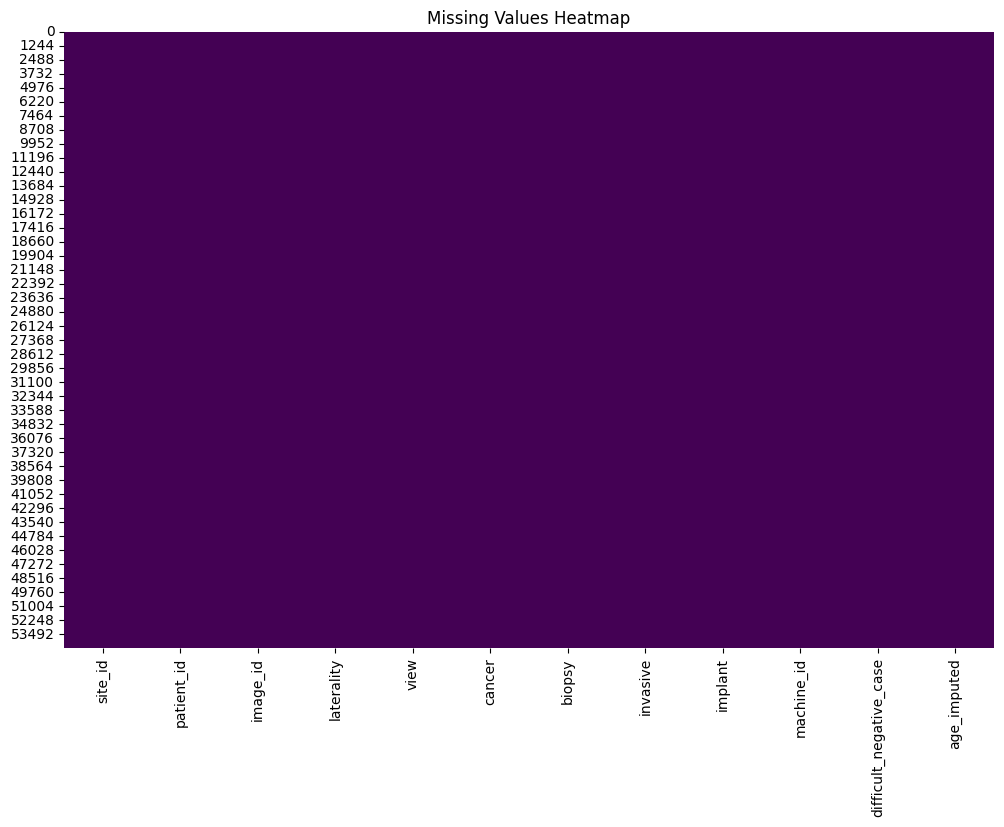

In [15]:
# ensuring handle missing values 

# Visualize missing values as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_02_c.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [16]:
# create a new csv file
import os

# Extract the three columns
extracted_data = data_02_c[['patient_id', 'image_id', 'cancer']].copy()

# Define the save path
save_path = '/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/extracted_cancer_data.csv'

# Create directory if it doesn't exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save to CSV
extracted_data.to_csv(save_path, index=False)

print(f"Data successfully saved to: {save_path}")
print(f"Extracted data shape: {extracted_data.shape}")
print("\nFirst 5 rows of extracted data:")
print(extracted_data.head())

Data successfully saved to: /Volumes/KODAK/folder 02/Brest_cancer_prediction/data/extracted_cancer_data.csv
Extracted data shape: (54706, 3)

First 5 rows of extracted data:
   patient_id    image_id  cancer
0       10006   462822612     0.0
1       10006  1459541791     0.0
2       10006  1864590858     0.0
3       10006  1874946579     0.0
4       10011   220375232     0.0


In [17]:
extracted_data.head()

,patient_id,image_id,cancer
0,10006,462822612,0.0
1,10006,1459541791,0.0
2,10006,1864590858,0.0
3,10006,1874946579,0.0
4,10011,220375232,0.0


In [18]:
import pandas as pd

# Load both datasets
extracted_path = '/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/extracted_cancer_data.csv'
unrecognized_path = '/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/unrecognized_images.csv'

# Read the files
try:
    extracted_df = pd.read_csv(extracted_path)
    unrecognized_df = pd.read_csv(unrecognized_path)
    
    print("Extracted data shape:", extracted_df.shape)
    print("Unrecognized images shape:", unrecognized_df.shape)
    
    # Find images in unrecognized that aren't in extracted data
    unrecognized_in_extracted = unrecognized_df[unrecognized_df['image_id'].isin(extracted_df['image_id'])]
    truly_unrecognized = unrecognized_df[~unrecognized_df['image_id'].isin(extracted_df['image_id'])]
    
    print("\nImages marked unrecognized but actually exist in extracted data:", len(unrecognized_in_extracted))
    print("Truly unrecognized images:", len(truly_unrecognized))
    
    # Save the truly unrecognized images
    output_path = '/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/confirmed_unrecognized_images.csv'
    truly_unrecognized.to_csv(output_path, index=False)
    print(f"\nSaved truly unrecognized images to: {output_path}")
    
    # Optional: Find images in extracted data not in unrecognized (recognized images)
    recognized_images = extracted_df[~extracted_df['image_id'].isin(unrecognized_df['image_id'])]
    print("\nNumber of recognized images:", len(recognized_images))
    
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please check the file paths exist.")
except Exception as e:
    print(f"An error occurred: {e}")

Extracted data shape: (54706, 3)
Unrecognized images shape: (89, 3)

Images marked unrecognized but actually exist in extracted data: 89
Truly unrecognized images: 0

Saved truly unrecognized images to: /Volumes/KODAK/folder 02/Brest_cancer_prediction/data/confirmed_unrecognized_images.csv

Number of recognized images: 54617


In [19]:
import pandas as pd

# File paths
extracted_path = '/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/extracted_cancer_data.csv'
unrecognized_path = '/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/unrecognized_images.csv'
output_path = '/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/cleaned_extracted_data.csv'

try:
    # Load the data
    extracted_df = pd.read_csv(extracted_path)
    unrecognized_df = pd.read_csv(unrecognized_path)
    
    # Remove unrecognized images from extracted data
    cleaned_df = extracted_df[~extracted_df['image_id'].isin(unrecognized_df['image_id'])]
    
    # Save the cleaned data
    cleaned_df.to_csv(output_path, index=False)
    
    # Print summary
    print(f"Original extracted data count: {len(extracted_df)}")
    print(f"Unrecognized images count: {len(unrecognized_df)}")
    print(f"Cleaned data count: {len(cleaned_df)}")
    print(f"Removed {len(extracted_df) - len(cleaned_df)} images")
    print(f"\nSaved cleaned data to: {output_path}")
    
    # Verify the unrecognized images are gone
    remaining_unrecognized = cleaned_df[cleaned_df['image_id'].isin(unrecognized_df['image_id'])]
    print(f"\nUnrecognized images remaining in cleaned data: {len(remaining_unrecognized)}")

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please check the file paths exist.")
except Exception as e:
    print(f"An error occurred: {e}")

Original extracted data count: 54706
Unrecognized images count: 89
Cleaned data count: 54617
Removed 89 images

Saved cleaned data to: /Volumes/KODAK/folder 02/Brest_cancer_prediction/data/cleaned_extracted_data.csv

Unrecognized images remaining in cleaned data: 0


## data mapping

In [ ]:
# Try to removeing unrecognized image data using unrecognized csv file

import pandas as pd
import os
import shutil
from pathlib import Path
import logging
from typing import Set, List, Tuple
import glob
from datetime import datetime

# Setup logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.StreamHandler(),
        logging.FileHandler(f'image_cleanup_{datetime.now().strftime("%Y%m%d_%H%M%S")}.log')
    ]
)
logger = logging.getLogger(__name__)

class BreastCancerDatasetCleaner:
    """
    A robust class to remove unrecognized images from breast cancer dataset
    based on patient_id and image_id combinations from a CSV file.
    """
    
    def __init__(self, csv_path: str, image_dir_path: str, backup_dir: str = None):
        """
        Initialize the dataset cleaner.
        
        Args:
            csv_path: Path to the CSV file containing unrecognized images
            image_dir_path: Path to the directory containing images
            backup_dir: Optional path to backup removed images (default: creates backup folder)
        """
        self.csv_path = Path(csv_path)
        self.image_dir_path = Path(image_dir_path)
        self.backup_dir = Path(backup_dir) if backup_dir else self.image_dir_path.parent / "removed_images_backup"
        
        # Validate paths
        self._validate_paths()
        
        # Statistics
        self.stats = {
            'total_unrecognized': 0,
            'images_found': 0,
            'images_removed': 0,
            'images_not_found': 0,
            'errors': 0
        }
    
    def _validate_paths(self) -> None:
        """Validate that all required paths exist."""
        if not self.csv_path.exists():
            raise FileNotFoundError(f"CSV file not found: {self.csv_path}")
        
        if not self.image_dir_path.exists():
            raise FileNotFoundError(f"Image directory not found: {self.image_dir_path}")
        
        if not self.image_dir_path.is_dir():
            raise NotADirectoryError(f"Image path is not a directory: {self.image_dir_path}")
    
    def _load_unrecognized_images(self) -> Set[str]:
        """
        Load unrecognized image identifiers from CSV file.
        
        Returns:
            Set of image identifiers (patient_id_image_id format)
        """
        try:
            logger.info(f"Loading unrecognized images from: {self.csv_path}")
            
            # Read CSV file
            df = pd.read_csv(self.csv_path)
            
            # Validate columns
            required_columns = ['patient_id', 'image_id']
            missing_columns = [col for col in required_columns if col not in df.columns]
            
            if missing_columns:
                raise ValueError(f"Missing required columns: {missing_columns}")
            
            # Create image identifiers by combining patient_id and image_id
            df['image_identifier'] = df['patient_id'].astype(str) + '_' + df['image_id'].astype(str)
            
            unrecognized_set = set(df['image_identifier'].tolist())
            self.stats['total_unrecognized'] = len(unrecognized_set)
            
            logger.info(f"Loaded {len(unrecognized_set)} unrecognized image identifiers")
            
            # Display sample identifiers for verification
            sample_ids = list(unrecognized_set)[:5]
            logger.info(f"Sample identifiers: {sample_ids}")
            
            return unrecognized_set
            
        except Exception as e:
            logger.error(f"Error loading CSV file: {str(e)}")
            raise
    
    def _find_image_files(self) -> List[Path]:
        """
        Find all image files in the directory.
        
        Returns:
            List of image file paths
        """
        # Common image extensions
        image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff', '*.tif']
        
        image_files = []
        for extension in image_extensions:
            image_files.extend(self.image_dir_path.glob(extension))
            image_files.extend(self.image_dir_path.glob(extension.upper()))
        
        # Also search in subdirectories
        for extension in image_extensions:
            image_files.extend(self.image_dir_path.rglob(extension))
            image_files.extend(self.image_dir_path.rglob(extension.upper()))
        
        # Remove duplicates
        image_files = list(set(image_files))
        
        logger.info(f"Found {len(image_files)} image files in the directory")
        return image_files
    
    def _create_backup_directory(self) -> None:
        """Create backup directory if it doesn't exist."""
        try:
            self.backup_dir.mkdir(parents=True, exist_ok=True)
            logger.info(f"Backup directory ready: {self.backup_dir}")
        except Exception as e:
            logger.error(f"Error creating backup directory: {str(e)}")
            raise
    
    def _extract_identifier_from_filename(self, filepath: Path) -> str:
        """
        Extract patient_id_image_id identifier from filename.
        
        Args:
            filepath: Path to the image file
            
        Returns:
            Image identifier (patient_id_image_id format)
        """
        # Get filename without extension
        filename = filepath.stem
        
        # The identifier should be the filename itself (patient_id_image_id)
        return filename
    
    def _move_image_to_backup(self, image_path: Path) -> bool:
        """
        Move image to backup directory.
        
        Args:
            image_path: Path to the image to be moved
            
        Returns:
            True if successful, False otherwise
        """
        try:
            # Preserve directory structure in backup
            relative_path = image_path.relative_to(self.image_dir_path)
            backup_path = self.backup_dir / relative_path
            
            # Create parent directories if needed
            backup_path.parent.mkdir(parents=True, exist_ok=True)
            
            # Move the file
            shutil.move(str(image_path), str(backup_path))
            logger.debug(f"Moved {image_path.name} to backup")
            return True
            
        except Exception as e:
            logger.error(f"Error moving {image_path}: {str(e)}")
            self.stats['errors'] += 1
            return False
    
    def process_images(self, dry_run: bool = False) -> dict:
        """
        Process images and remove unrecognized ones.
        
        Args:
            dry_run: If True, only simulate the process without actually removing files
            
        Returns:
            Dictionary with processing statistics
        """
        logger.info("Starting image processing...")
        logger.info(f"Dry run mode: {dry_run}")
        
        try:
            # Load unrecognized image identifiers
            unrecognized_ids = self._load_unrecognized_images()
            
            # Find all image files
            image_files = self._find_image_files()
            
            if not image_files:
                logger.warning("No image files found in the directory!")
                return self.stats
            
            # Create backup directory if not in dry run mode
            if not dry_run:
                self._create_backup_directory()
            
            # Process each image file
            images_to_remove = []
            
            for image_path in image_files:
                try:
                    # Extract identifier from filename
                    identifier = self._extract_identifier_from_filename(image_path)
                    
                    # Check if this image should be removed
                    if identifier in unrecognized_ids:
                        images_to_remove.append((image_path, identifier))
                        self.stats['images_found'] += 1
                        
                        if dry_run:
                            logger.info(f"[DRY RUN] Would remove: {image_path.name}")
                        else:
                            if self._move_image_to_backup(image_path):
                                self.stats['images_removed'] += 1
                                logger.info(f"Removed: {image_path.name}")
                
                except Exception as e:
                    logger.error(f"Error processing {image_path}: {str(e)}")
                    self.stats['errors'] += 1
            
            # Check for unrecognized IDs that weren't found
            found_ids = {identifier for _, identifier in images_to_remove}
            not_found_ids = unrecognized_ids - found_ids
            self.stats['images_not_found'] = len(not_found_ids)
            
            if not_found_ids:
                logger.warning(f"{len(not_found_ids)} unrecognized image IDs were not found in the directory")
                logger.debug(f"Missing IDs sample: {list(not_found_ids)[:10]}")
            
            # Log final statistics
            self._log_final_stats(dry_run)
            
            return self.stats
            
        except Exception as e:
            logger.error(f"Error during processing: {str(e)}")
            raise
    
    def _log_final_stats(self, dry_run: bool) -> None:
        """Log final processing statistics."""
        logger.info("="*50)
        logger.info("PROCESSING COMPLETED")
        logger.info("="*50)
        logger.info(f"Total unrecognized IDs in CSV: {self.stats['total_unrecognized']}")
        logger.info(f"Images found for removal: {self.stats['images_found']}")
        
        if dry_run:
            logger.info(f"Images that WOULD be removed: {self.stats['images_found']}")
        else:
            logger.info(f"Images successfully removed: {self.stats['images_removed']}")
            logger.info(f"Images backed up to: {self.backup_dir}")
        
        logger.info(f"Unrecognized IDs not found: {self.stats['images_not_found']}")
        logger.info(f"Errors encountered: {self.stats['errors']}")
        logger.info("="*50)

# Main execution function for Jupyter notebook
def cleanup_breast_cancer_dataset(csv_path: str, image_dir_path: str, 
                                 backup_dir: str = None, dry_run: bool = True):
    """
    Main function to clean up breast cancer dataset by removing unrecognized images.
    
    Args:
        csv_path: Path to CSV file with unrecognized images
        image_dir_path: Path to directory containing images
        backup_dir: Optional custom backup directory path
        dry_run: If True, simulate the process without actually removing files
    
    Returns:
        Processing statistics dictionary
    """
    cleaner = BreastCancerDatasetCleaner(csv_path, image_dir_path, backup_dir)
    return cleaner.process_images(dry_run=dry_run)

# Example usage for your specific paths
if __name__ == "__main__":
    # Your specific paths
    CSV_PATH = "/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/unrecognized_images.csv"
    IMAGE_DIR_PATH = "/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/raw_data"
    
    print("Breast Cancer Dataset Cleanup Tool")
    print("="*50)
    
    # First run in dry-run mode to see what would be removed
    print("Running in DRY RUN mode first...")
    stats = cleanup_breast_cancer_dataset(
        csv_path=CSV_PATH,
        image_dir_path=IMAGE_DIR_PATH,
        dry_run=True
    )
    
    print(f"\nDry run completed. Found {stats['images_found']} images to remove.")
    
    # Uncomment the following lines to actually remove the images
print("\nTo actually remove the images, run:")
print("stats = cleanup_breast_cancer_dataset(CSV_PATH, IMAGE_DIR_PATH, dry_run=False)")

2025-06-24 14:01:03,279 - INFO - Starting image processing...
2025-06-24 14:01:03,279 - INFO - Dry run mode: True
2025-06-24 14:01:03,280 - INFO - Loading unrecognized images from: /Volumes/KODAK/folder 02/Brest_cancer_prediction/data/unrecognized_images.csv
2025-06-24 14:01:03,297 - INFO - Loaded 89 unrecognized image identifiers
2025-06-24 14:01:03,297 - INFO - Sample identifiers: ['13095_486827821', '33581_1398764972', '33581_1335115222', '36590_83218100', '52509_910813610']


Breast Cancer Dataset Cleanup Tool
Running in DRY RUN mode first...


2025-06-24 14:01:34,481 - INFO - Found 109234 image files in the directory
2025-06-24 14:01:34,526 - WARNING - 89 unrecognized image IDs were not found in the directory
2025-06-24 14:01:34,526 - INFO - ==================================================
2025-06-24 14:01:34,527 - INFO - PROCESSING COMPLETED
2025-06-24 14:01:34,527 - INFO - ==================================================
2025-06-24 14:01:34,527 - INFO - Total unrecognized IDs in CSV: 89
2025-06-24 14:01:34,527 - INFO - Images found for removal: 0
2025-06-24 14:01:34,527 - INFO - Images that WOULD be removed: 0
2025-06-24 14:01:34,527 - INFO - Unrecognized IDs not found: 89
2025-06-24 14:01:34,528 - INFO - Errors encountered: 0
2025-06-24 14:01:34,528 - INFO - ==================================================



Dry run completed. Found 0 images to remove.

To actually remove the images, run:
stats = cleanup_breast_cancer_dataset(CSV_PATH, IMAGE_DIR_PATH, dry_run=False)


In [ ]:
import pandas as pd
import os
import shutil
from pathlib import Path
import logging
from tqdm import tqdm
import glob

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

class BreastCancerImageOrganizer:
    def __init__(self, csv_path, source_dir, target_dir):
        """
        Initialize the image organizer
        
        Args:
            csv_path (str): Path to the CSV file with image mappings
            source_dir (str): Path to the source directory containing all images
            target_dir (str): Path to the target directory for organized images
        """
        self.csv_path = csv_path
        self.source_dir = Path(source_dir)
        self.target_dir = Path(target_dir)
        
        # Create target directories
        self.cancer_dir = self.target_dir / 'cancer'
        self.no_cancer_dir = self.target_dir / 'no_cancer'
        
    def load_and_validate_csv(self):
        """Load and validate the CSV file"""
        try:
            logger.info(f"Loading CSV file from: {self.csv_path}")
            self.df = pd.read_csv(self.csv_path)
            
            # Validate required columns
            required_columns = ['patient_id', 'image_id', 'cancer']
            missing_columns = [col for col in required_columns if col not in self.df.columns]
            
            if missing_columns:
                raise ValueError(f"Missing required columns: {missing_columns}")
            
            logger.info(f"CSV loaded successfully. Shape: {self.df.shape}")
            logger.info(f"Columns: {list(self.df.columns)}")
            
            # Clean the data
            self.df = self.df.dropna(subset=required_columns)
            
            # Create image filename from patient_id and image_id
            self.df['image_filename'] = self.df['patient_id'].astype(str) + '_' + self.df['image_id'].astype(str)
            
            # Display cancer distribution
            cancer_counts = self.df['cancer'].value_counts()
            logger.info(f"Cancer distribution:\n{cancer_counts}")
            
            return True
            
        except Exception as e:
            logger.error(f"Error loading CSV: {str(e)}")
            return False
    
    def create_directories(self):
        """Create target directories if they don't exist"""
        try:
            self.target_dir.mkdir(parents=True, exist_ok=True)
            self.cancer_dir.mkdir(parents=True, exist_ok=True)
            self.no_cancer_dir.mkdir(parents=True, exist_ok=True)
            
            logger.info(f"Created directories:")
            logger.info(f"  - Cancer: {self.cancer_dir}")
            logger.info(f"  - No Cancer: {self.no_cancer_dir}")
            
            return True
            
        except Exception as e:
            logger.error(f"Error creating directories: {str(e)}")
            return False
    
    def find_image_files(self):
        """Find all image files in the source directory"""
        try:
            # Common image extensions
            image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff', '*.tif']
            
            self.image_files = {}
            total_files = 0
            
            logger.info(f"Scanning for images in: {self.source_dir}")
            
            for extension in image_extensions:
                files = list(self.source_dir.glob(extension))
                files.extend(list(self.source_dir.glob(extension.upper())))
                
                for file_path in files:
                    # Extract filename without extension for matching
                    filename_base = file_path.stem
                    self.image_files[filename_base] = file_path
                    total_files += 1
            
            logger.info(f"Found {total_files} image files")
            return True
            
        except Exception as e:
            logger.error(f"Error finding image files: {str(e)}")
            return False
    
    def organize_images(self):
        """Organize images based on cancer labels"""
        try:
            matched_images = 0
            unmatched_images = []
            cancer_count = 0
            no_cancer_count = 0
            
            logger.info("Starting image organization...")
            
            # Process each row in the dataframe
            for idx, row in tqdm(self.df.iterrows(), total=len(self.df), desc="Processing images"):
                image_filename = row['image_filename']
                cancer_status = row['cancer']
                
                # Look for matching image file
                matching_file = None
                for filename_base, file_path in self.image_files.items():
                    if image_filename in filename_base or filename_base in image_filename:
                        matching_file = file_path
                        break
                
                if matching_file:
                    # Determine target directory based on cancer status
                    if cancer_status == 1 or str(cancer_status).lower() in ['yes', 'true', 'positive']:
                        target_path = self.cancer_dir / matching_file.name
                        cancer_count += 1
                    else:
                        target_path = self.no_cancer_dir / matching_file.name
                        no_cancer_count += 1
                    
                    # Copy the file
                    try:
                        shutil.copy2(matching_file, target_path)
                        matched_images += 1
                    except Exception as e:
                        logger.warning(f"Error copying {matching_file}: {str(e)}")
                
                else:
                    unmatched_images.append(image_filename)
            
            # Log results
            logger.info(f"Organization complete!")
            logger.info(f"Successfully organized: {matched_images} images")
            logger.info(f"Cancer images: {cancer_count}")
            logger.info(f"No cancer images: {no_cancer_count}")
            logger.info(f"Unmatched images: {len(unmatched_images)}")
            
            if unmatched_images:
                logger.warning(f"First 10 unmatched images: {unmatched_images[:10]}")
            
            return True
            
        except Exception as e:
            logger.error(f"Error organizing images: {str(e)}")
            return False
    
    def generate_summary(self):
        """Generate a summary of the organization process"""
        try:
            summary = {
                'total_csv_records': len(self.df),
                'total_image_files_found': len(self.image_files),
                'cancer_images': len(list(self.cancer_dir.glob('*'))),
                'no_cancer_images': len(list(self.no_cancer_dir.glob('*'))),
            }
            
            summary['total_organized'] = summary['cancer_images'] + summary['no_cancer_images']
            summary['organization_rate'] = (summary['total_organized'] / summary['total_csv_records']) * 100
            
            logger.info("\n" + "="*50)
            logger.info("ORGANIZATION SUMMARY")
            logger.info("="*50)
            logger.info(f"Total CSV records: {summary['total_csv_records']}")
            logger.info(f"Total image files found: {summary['total_image_files_found']}")
            logger.info(f"Cancer images organized: {summary['cancer_images']}")
            logger.info(f"No cancer images organized: {summary['no_cancer_images']}")
            logger.info(f"Total images organized: {summary['total_organized']}")
            logger.info(f"Organization success rate: {summary['organization_rate']:.2f}%")
            logger.info("="*50)
            
            return summary
            
        except Exception as e:
            logger.error(f"Error generating summary: {str(e)}")
            return None
    
    def run(self):
        """Run the complete organization process"""
        logger.info("Starting Breast Cancer Image Organization Process")
        
        # Step 1: Load and validate CSV
        if not self.load_and_validate_csv():
            return False
        
        # Step 2: Create target directories
        if not self.create_directories():
            return False
        
        # Step 3: Find image files
        if not self.find_image_files():
            return False
        
        # Step 4: Organize images
        if not self.organize_images():
            return False
        
        # Step 5: Generate summary
        self.generate_summary()
        
        logger.info("Process completed successfully!")
        return True

# Main execution
def main():
    # Define paths
    csv_path = '/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/cleaned_extracted_data.csv'
    source_dir = '/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/raw_data'
    target_dir = '/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/preprocessed_data'
    
    # Create organizer instance
    organizer = BreastCancerImageOrganizer(csv_path, source_dir, target_dir)
    
    # Run the organization process
    success = organizer.run()
    
    if success:
        print("\n Image organization completed successfully!")
        print(f" Organized images are saved in: {target_dir}")
        print(f"   - Cancer images: {target_dir}/cancer/")
        print(f"   - No cancer images: {target_dir}/no_cancer/")
    else:
        print("\n Image organization failed. Please check the logs for details.")

# Run the script
if __name__ == "__main__":
    main()

2025-06-26 10:18:09,121 - INFO - Starting Breast Cancer Image Organization Process
2025-06-26 10:18:09,121 - INFO - Loading CSV file from: /Volumes/KODAK/folder 02/Brest_cancer_prediction/data/cleaned_extracted_data.csv
2025-06-26 10:18:09,156 - INFO - CSV loaded successfully. Shape: (54617, 3)
2025-06-26 10:18:09,156 - INFO - Columns: ['patient_id', 'image_id', 'cancer']
2025-06-26 10:18:09,180 - INFO - Cancer distribution:
cancer
0.0    53460
1.0     1157
Name: count, dtype: int64
2025-06-26 10:18:09,242 - INFO - Created directories:
2025-06-26 10:18:09,243 - INFO -   - Cancer: /Volumes/KODAK/folder 02/Brest_cancer_prediction/data/preprocessed_data/cancer
2025-06-26 10:18:09,243 - INFO -   - No Cancer: /Volumes/KODAK/folder 02/Brest_cancer_prediction/data/preprocessed_data/no_cancer
2025-06-26 10:18:09,243 - INFO - Scanning for images in: /Volumes/KODAK/folder 02/Brest_cancer_prediction/data/raw_data
2025-06-26 10:19:23,196 - INFO - Found 109234 image files
2025-06-26 10:19:23,196 - 


✅ Image organization completed successfully!
📁 Organized images are saved in: /Volumes/KODAK/folder 02/Brest_cancer_prediction/data/preprocessed_data
   - Cancer images: /Volumes/KODAK/folder 02/Brest_cancer_prediction/data/preprocessed_data/cancer/
   - No cancer images: /Volumes/KODAK/folder 02/Brest_cancer_prediction/data/preprocessed_data/no_cancer/


## Doing the Oversampling to the handle imbalance issue 

 Starting Image Dataset Balancing Process

 Visualizing augmentation examples:


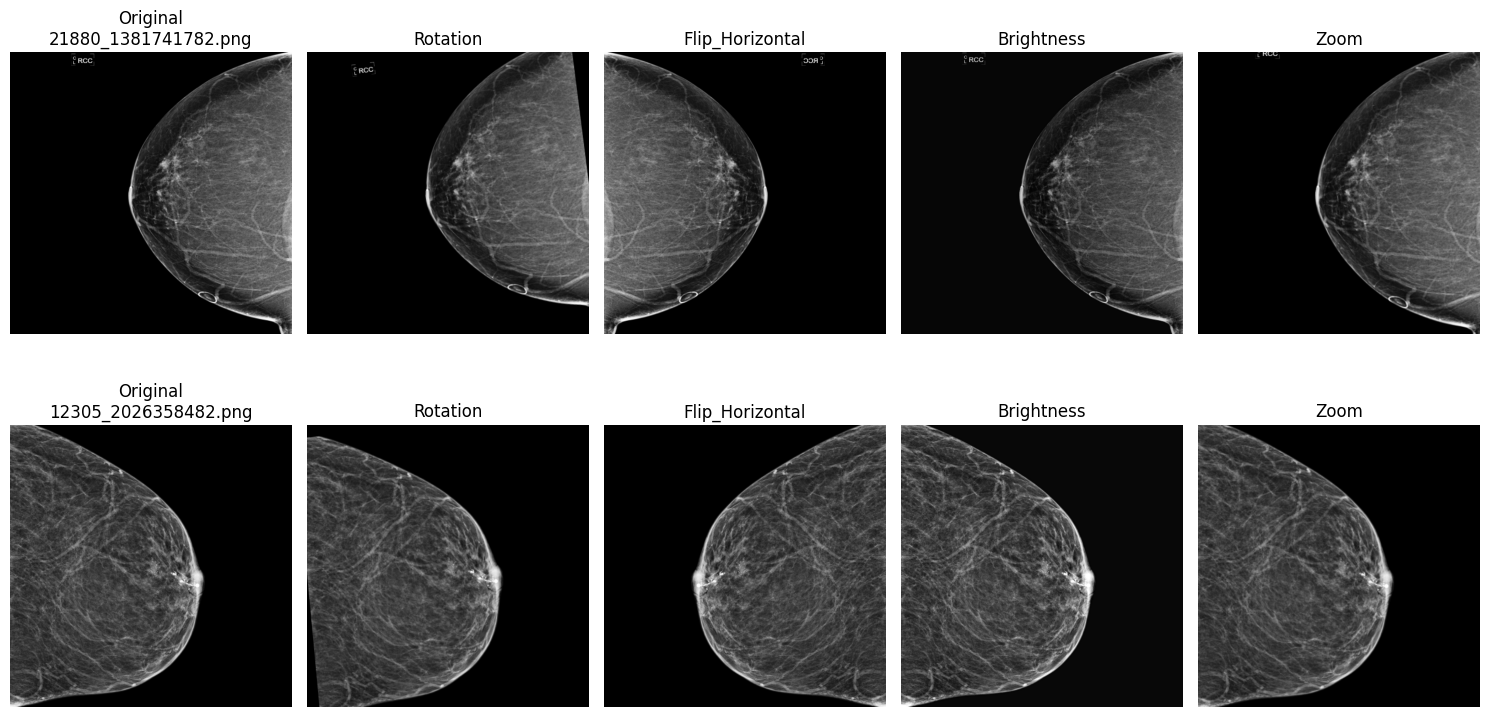


 Starting oversampling process...
Current dataset distribution:
Cancer images: 2314
No-cancer images: 106920
Imbalance ratio: 1:46.21

Target count: 106920
Images to generate: 104606

Generating 104606 augmented cancer images...


Generating images: 100%|██████████| 104606/104606 [1:37:19<00:00, 17.91it/s] 



Oversampling completed successfully!
Generated 104606 new cancer images

Final dataset distribution:
Cancer images: 211526
No-cancer images: 106920
Balance ratio: 1:0.51
 Dataset balance could be improved

 Process completed successfully!
Your dataset is now balanced and ready for training!


In [ ]:
import os
import cv2
import numpy as np
import random
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import time
import warnings
warnings.filterwarnings('ignore')

class ImageOversampler:
    """
    Professional image oversampling class for balancing datasets using data augmentation.
    Supports various augmentation techniques to generate synthetic images.
    Enhanced to handle large-scale oversampling (2,314 -> 106,920 images).
    """
    
    def __init__(self, cancer_path, no_cancer_path, seed=42):
        """
        Initialize the oversampler with dataset paths.
        
        Args:
            cancer_path (str): Path to cancer images folder
            no_cancer_path (str): Path to no_cancer images folder
            seed (int): Random seed for reproducibility
        """
        self.cancer_path = Path(cancer_path)
        self.no_cancer_path = Path(no_cancer_path)
        self.seed = seed
        
        # Set random seeds for reproducibility
        random.seed(seed)
        np.random.seed(seed)
        
        # Initialize counters
        self.cancer_count = 0
        self.no_cancer_count = 0
        
        # Supported image formats
        self.supported_formats = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif'}
        
    def count_images(self):
        """Count images in both directories."""
        cancer_files = [f for f in self.cancer_path.iterdir() 
                       if f.suffix.lower() in self.supported_formats and f.is_file()]
        no_cancer_files = [f for f in self.no_cancer_path.iterdir() 
                          if f.suffix.lower() in self.supported_formats and f.is_file()]
        
        self.cancer_count = len(cancer_files)
        self.no_cancer_count = len(no_cancer_files)
        
        print(f"Current dataset distribution:")
        print(f"Cancer images: {self.cancer_count:,}")
        print(f"No-cancer images: {self.no_cancer_count:,}")
        print(f"Imbalance ratio: 1:{self.no_cancer_count/self.cancer_count:.2f}")
        
        return cancer_files, no_cancer_files
    
    def augment_image(self, image, augmentation_type):
        """
        Apply various augmentation techniques to an image.
        
        Args:
            image (numpy.ndarray): Input image
            augmentation_type (str): Type of augmentation to apply
            
        Returns:
            numpy.ndarray: Augmented image
        """
        if image is None or image.size == 0:
            return None
            
        height, width = image.shape[:2]
        
        try:
            if augmentation_type == 'rotation':
                # Random rotation (-20 to 20 degrees)
                angle = random.uniform(-20, 20)
                center = (width // 2, height // 2)
                rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
                augmented = cv2.warpAffine(image, rotation_matrix, (width, height), 
                                         borderMode=cv2.BORDER_REFLECT)
                
            elif augmentation_type == 'flip_horizontal':
                # Horizontal flip
                augmented = cv2.flip(image, 1)
                
            elif augmentation_type == 'flip_vertical':
                # Vertical flip
                augmented = cv2.flip(image, 0)
                
            elif augmentation_type == 'brightness':
                # Brightness adjustment
                alpha = random.uniform(0.7, 1.3)  # Contrast control
                beta = random.randint(-20, 20)    # Brightness shift
                augmented = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
                
            elif augmentation_type == 'zoom':
                # Random zoom (0.8 to 1.2)
                zoom_factor = random.uniform(0.8, 1.2)
                center_x, center_y = width // 2, height // 2
                
                # Calculate new dimensions
                new_width = int(width * zoom_factor)
                new_height = int(height * zoom_factor)
                
                # Resize image
                resized = cv2.resize(image, (new_width, new_height))
                
                if zoom_factor > 1.0:  # Zoom in - crop center
                    start_x = max(0, (new_width - width) // 2)
                    start_y = max(0, (new_height - height) // 2)
                    end_x = min(new_width, start_x + width)
                    end_y = min(new_height, start_y + height)
                    augmented = resized[start_y:end_y, start_x:end_x]
                    
                    # Ensure output size matches original
                    if augmented.shape[:2] != (height, width):
                        augmented = cv2.resize(augmented, (width, height))
                else:  # Zoom out - pad image
                    augmented = np.zeros_like(image)
                    start_x = (width - new_width) // 2
                    start_y = (height - new_height) // 2
                    end_x = start_x + new_width
                    end_y = start_y + new_height
                    augmented[start_y:end_y, start_x:end_x] = resized
                    
            elif augmentation_type == 'translation':
                # Random translation
                tx = random.randint(-30, 30)
                ty = random.randint(-30, 30)
                translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
                augmented = cv2.warpAffine(image, translation_matrix, (width, height),
                                         borderMode=cv2.BORDER_REFLECT)
                
            elif augmentation_type == 'noise':
                # Add Gaussian noise
                noise_std = random.uniform(3, 8)
                noise = np.random.normal(0, noise_std, image.shape).astype(np.int16)
                augmented = np.clip(image.astype(np.int16) + noise, 0, 255).astype(np.uint8)
                
            elif augmentation_type == 'contrast':
                # Contrast adjustment
                alpha = random.uniform(0.7, 1.3)
                augmented = cv2.convertScaleAbs(image, alpha=alpha, beta=0)
                
            elif augmentation_type == 'blur':
                # Slight blur
                kernel_size = random.choice([3, 5])
                augmented = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
                
            elif augmentation_type == 'sharpen':
                # Sharpen filter
                kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
                augmented = cv2.filter2D(image, -1, kernel)
                
            elif augmentation_type == 'combined':
                # Combination of multiple augmentations
                augmented = image.copy()
                
                # Apply random rotation
                if random.random() > 0.5:
                    angle = random.uniform(-10, 10)
                    center = (width // 2, height // 2)
                    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
                    augmented = cv2.warpAffine(augmented, rotation_matrix, (width, height))
                
                # Apply brightness/contrast
                if random.random() > 0.5:
                    alpha = random.uniform(0.8, 1.2)
                    beta = random.randint(-10, 10)
                    augmented = cv2.convertScaleAbs(augmented, alpha=alpha, beta=beta)
                
                # Apply slight noise
                if random.random() > 0.7:
                    noise = np.random.normal(0, 3, augmented.shape).astype(np.int16)
                    augmented = np.clip(augmented.astype(np.int16) + noise, 0, 255).astype(np.uint8)
                    
            else:
                # Default: slight rotation
                angle = random.uniform(-15, 15)
                center = (width // 2, height // 2)
                rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
                augmented = cv2.warpAffine(image, rotation_matrix, (width, height))
                
        except Exception as e:
            print(f"Error in augmentation {augmentation_type}: {str(e)}")
            return image  # Return original image if augmentation fails
            
        return augmented
    
    def generate_filename(self, original_filename, augmentation_type, counter):
        """
        Generate a unique filename for augmented image.
        
        Args:
            original_filename (str): Original filename
            augmentation_type (str): Type of augmentation applied
            counter (int): Counter for uniqueness
            
        Returns:
            str: New filename
        """
        stem = Path(original_filename).stem
        extension = Path(original_filename).suffix
        return f"{stem}_aug_{augmentation_type}_{counter:06d}{extension}"
    
    def oversample_to_target(self, target_count=None):
        """
        Perform oversampling on the cancer class to reach exact target count.
        
        Args:
            target_count (int): Target number of cancer images. If None, matches no_cancer count.
        """
        # Count images
        cancer_files, no_cancer_files = self.count_images()
        
        if target_count is None:
            target_count = self.no_cancer_count
        
        if self.cancer_count >= target_count:
            print(f"Cancer class already has {self.cancer_count:,} images, which is >= target {target_count:,}")
            return
        
        # Calculate how many images to generate
        images_to_generate = target_count - self.cancer_count
        
        print(f"\nOversampling Plan:")
        print(f"Current cancer images: {self.cancer_count:,}")
        print(f"Target cancer images: {target_count:,}")
        print(f"Images to generate: {images_to_generate:,}")
        print(f"Multiplication factor: {target_count/self.cancer_count:.1f}x")
        
        # Confirm with user
        response = input(f"\nThis will generate {images_to_generate:,} new images. Continue? (y/n): ")
        if response.lower() != 'y':
            print("Operation cancelled.")
            return
        
        # Define augmentation strategies with weights for variety
        augmentation_types = [
            'rotation', 'flip_horizontal', 'flip_vertical', 
            'brightness', 'zoom', 'translation', 'noise', 
            'contrast', 'blur', 'sharpen', 'combined'
        ]
        
        # Calculate how many times each original image needs to be augmented
        times_to_replicate = images_to_generate // self.cancer_count
        remaining_images = images_to_generate % self.cancer_count
        
        print(f"\nEach original image will be augmented {times_to_replicate} times")
        print(f"Additional {remaining_images} images will be generated from random selection")
        
        # Generate augmented images
        print(f"\nGenerating {images_to_generate:,} augmented cancer images...")
        
        generated_count = 0
        counter = 1
        failed_count = 0
        error_count = 0
        
        # Initialize progress tracking
        import time
        start_time = time.time()
        
        # Create main progress bar
        main_pbar = tqdm(total=images_to_generate, 
                        desc="🔄 Generating Images", 
                        unit="img",
                        bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}]',
                        colour='green')
        
        # Augmentation type counters for statistics
        aug_stats = {aug_type: 0 for aug_type in augmentation_types}
        
        try:
            # First phase: Augment each original image multiple times
            print(f"\n📊 Phase 1: Systematic augmentation ({times_to_replicate}x per image)")
            phase1_target = len(cancer_files) * times_to_replicate
            
            for file_idx, original_file in enumerate(cancer_files):
                if generated_count >= images_to_generate:
                    break
                
                # Update progress bar description with current file info
                main_pbar.set_description(f"🔄 Processing {original_file.name[:20]}...")
                
                for rep in range(times_to_replicate):
                    if generated_count >= images_to_generate:
                        break
                        
                    try:
                        # Read the image
                        image = cv2.imread(str(original_file))
                        if image is None:
                            failed_count += 1
                            continue
                        
                        # Randomly select augmentation type
                        augmentation_type = random.choice(augmentation_types)
                        
                        # Apply augmentation
                        augmented_image = self.augment_image(image, augmentation_type)
                        
                        if augmented_image is None:
                            failed_count += 1
                            continue
                        
                        # Generate new filename
                        new_filename = self.generate_filename(
                            original_file.name, augmentation_type, counter
                        )
                        
                        # Save augmented image in the same cancer folder
                        output_path = self.cancer_path / new_filename
                        
                        # Save the image
                        success = cv2.imwrite(str(output_path), augmented_image)
                        
                        if success:
                            generated_count += 1
                            counter += 1
                            aug_stats[augmentation_type] += 1
                            
                            # Update progress bar with detailed info
                            elapsed = time.time() - start_time
                            rate = generated_count / elapsed if elapsed > 0 else 0
                            remaining_time = (images_to_generate - generated_count) / rate if rate > 0 else 0
                            
                            # Update progress bar postfix with real-time stats
                            main_pbar.set_postfix({
                                'Rate': f'{rate:.1f} img/s',
                                'ETA': f'{remaining_time/60:.1f}m',
                                'Fails': failed_count,
                                'Phase': '1/2'
                            })
                            main_pbar.update(1)
                            
                            # Print milestone updates
                            if generated_count % 10000 == 0:
                                print(f"\n🎯 Milestone: {generated_count:,} images generated!")
                                print(f"   ⏱️  Time elapsed: {elapsed/60:.1f} minutes")
                                print(f"   📈 Generation rate: {rate:.1f} images/second")
                                
                        else:
                            failed_count += 1
                            
                    except Exception as e:
                        error_count += 1
                        if error_count % 100 == 0:  # Print error every 100 errors
                            tqdm.write(f"⚠️  Error #{error_count}: {str(e)[:50]}...")
                        continue
                
                # Show progress through original files
                if (file_idx + 1) % 100 == 0:
                    tqdm.write(f"📁 Processed {file_idx + 1}/{len(cancer_files)} original files")
                
                if generated_count >= images_to_generate:
                    break
            
            # Second phase: Generate remaining images from random selection
            remaining = images_to_generate - generated_count
            if remaining > 0:
                print(f"\n📊 Phase 2: Random augmentation ({remaining:,} remaining images)")
                main_pbar.set_description("🔄 Random Selection Phase")
                
                attempts = 0
                max_attempts = remaining * 5  # Prevent infinite loops
                
                while generated_count < images_to_generate and attempts < max_attempts:
                    attempts += 1
                    
                    # Randomly select a cancer image
                    selected_file = random.choice(cancer_files)
                    
                    try:
                        # Read the image
                        image = cv2.imread(str(selected_file))
                        if image is None:
                            failed_count += 1
                            continue
                        
                        # Randomly select augmentation type
                        augmentation_type = random.choice(augmentation_types)
                        
                        # Apply augmentation
                        augmented_image = self.augment_image(image, augmentation_type)
                        
                        if augmented_image is None:
                            failed_count += 1
                            continue
                        
                        # Generate new filename
                        new_filename = self.generate_filename(
                            selected_file.name, augmentation_type, counter
                        )
                        
                        # Save augmented image in the same cancer folder
                        output_path = self.cancer_path / new_filename
                        
                        # Save the image
                        success = cv2.imwrite(str(output_path), augmented_image)
                        
                        if success:
                            generated_count += 1
                            counter += 1
                            aug_stats[augmentation_type] += 1
                            
                            # Update progress bar with detailed info
                            elapsed = time.time() - start_time
                            rate = generated_count / elapsed if elapsed > 0 else 0
                            remaining_time = (images_to_generate - generated_count) / rate if rate > 0 else 0
                            
                            # Update progress bar postfix
                            main_pbar.set_postfix({
                                'Rate': f'{rate:.1f} img/s',
                                'ETA': f'{remaining_time/60:.1f}m',
                                'Fails': failed_count,
                                'Phase': '2/2'
                            })
                            main_pbar.update(1)
                            
                            # Print milestone updates
                            if generated_count % 10000 == 0:
                                print(f"\n🎯 Milestone: {generated_count:,} images generated!")
                                print(f"   ⏱️  Time elapsed: {elapsed/60:.1f} minutes")
                                print(f"   📈 Generation rate: {rate:.1f} images/second")
                                
                        else:
                            failed_count += 1
                            
                    except Exception as e:
                        error_count += 1
                        if error_count % 100 == 0:
                            tqdm.write(f"⚠️  Error #{error_count}: {str(e)[:50]}...")
                        continue
                        
        finally:
            main_pbar.close()
            
        # Print final statistics
        total_time = time.time() - start_time
        print(f"\n📈 Generation Statistics:")
        print(f"   ✅ Successfully generated: {generated_count:,} images")
        print(f"   ❌ Failed attempts: {failed_count:,}")
        print(f"   🐛 Errors encountered: {error_count:,}")
        print(f"   ⏱️  Total time: {total_time/60:.1f} minutes")
        print(f"   📊 Average rate: {generated_count/total_time:.1f} images/second")
        
        # Print augmentation type distribution
        print(f"\n🎨 Augmentation Type Distribution:")
        for aug_type, count in sorted(aug_stats.items(), key=lambda x: x[1], reverse=True):
            percentage = (count / generated_count * 100) if generated_count > 0 else 0
            print(f"   {aug_type:>12}: {count:>6,} ({percentage:>5.1f}%)")
        
        return generated_count
        
        print(f"\nOversampling completed successfully!")
        print(f"Generated {generated_count:,} new cancer images")
        
        # Final count
        self.count_images_final()
    
    def count_images_final(self):
        """Count images after oversampling."""
        cancer_files = [f for f in self.cancer_path.iterdir() 
                       if f.suffix.lower() in self.supported_formats and f.is_file()]
        no_cancer_files = [f for f in self.no_cancer_path.iterdir() 
                          if f.suffix.lower() in self.supported_formats and f.is_file()]
        
        final_cancer_count = len(cancer_files)
        final_no_cancer_count = len(no_cancer_files)
        
        print(f"\nFinal dataset distribution:")
        print(f"Cancer images: {final_cancer_count:,}")
        print(f"No-cancer images: {final_no_cancer_count:,}")
        
        if final_cancer_count > 0:
            ratio = final_no_cancer_count / final_cancer_count
            print(f"Balance ratio: 1:{ratio:.2f}")
            
            if abs(final_cancer_count - final_no_cancer_count) <= 1:
                print("✅ Dataset is now perfectly balanced!")
            elif ratio <= 1.1 and ratio >= 0.9:
                print("✅ Dataset is well balanced!")
            else:
                print("⚠️  Dataset balance could be improved")
        
        return final_cancer_count, final_no_cancer_count
    
    def visualize_augmentations(self, num_examples=3):
        """
        Visualize some augmentation examples.
        
        Args:
            num_examples (int): Number of examples to show
        """
        cancer_files = [f for f in self.cancer_path.iterdir() 
                       if f.suffix.lower() in self.supported_formats and f.is_file() 
                       and not f.name.startswith('.') and not 'aug_' in f.name]
        
        if len(cancer_files) == 0:
            print("No original cancer images found for visualization")
            return
        
        # Select random images
        selected_files = random.sample(cancer_files, min(num_examples, len(cancer_files)))
        
        augmentation_types = ['rotation', 'flip_horizontal', 'brightness', 'zoom', 'combined']
        
        fig, axes = plt.subplots(num_examples, len(augmentation_types) + 1, 
                                figsize=(18, 4 * num_examples))
        
        if num_examples == 1:
            axes = axes.reshape(1, -1)
        
        for i, file_path in enumerate(selected_files):
            try:
                # Load original image
                original = cv2.imread(str(file_path))
                if original is None:
                    continue
                    
                original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
                
                # Show original
                axes[i, 0].imshow(original_rgb)
                axes[i, 0].set_title(f'Original\n{file_path.name[:20]}...')
                axes[i, 0].axis('off')
                
                # Show augmentations
                for j, aug_type in enumerate(augmentation_types):
                    augmented = self.augment_image(original, aug_type)
                    if augmented is not None:
                        augmented_rgb = cv2.cvtColor(augmented, cv2.COLOR_BGR2RGB)
                        
                        axes[i, j + 1].imshow(augmented_rgb)
                        axes[i, j + 1].set_title(f'{aug_type.replace("_", " ").title()}')
                        axes[i, j + 1].axis('off')
                        
            except Exception as e:
                print(f"Error visualizing {file_path}: {str(e)}")
                continue
        
        plt.tight_layout()
        plt.show()
    
    def check_disk_space(self, images_to_generate, avg_image_size_mb=0.5):
        """
        Check if there's enough disk space for the augmentation.
        
        Args:
            images_to_generate (int): Number of images to generate
            avg_image_size_mb (float): Average image size in MB
        """
        required_space_gb = (images_to_generate * avg_image_size_mb) / 1024
        
        # Get available disk space
        stat = os.statvfs(str(self.cancer_path))
        available_space_gb = (stat.f_bavail * stat.f_frsize) / (1024**3)
        
        print(f"\nDisk Space Check:")
        print(f"Required space: {required_space_gb:.2f} GB")
        print(f"Available space: {available_space_gb:.2f} GB")
        
        if available_space_gb < required_space_gb * 1.1:  # 10% buffer
            print("⚠️  WARNING: Insufficient disk space!")
            return False
        else:
            print("✅ Sufficient disk space available")
            return True

# Main execution
def main():
    """Main function to execute the oversampling process."""
    
    # Define paths - UPDATE THESE PATHS TO MATCH YOUR SYSTEM
    cancer_path = '/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/preprocessed_data/cancer'
    no_cancer_path = '/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/preprocessed_data/no_cancer'
    
    # Verify paths exist
    if not os.path.exists(cancer_path):
        print(f"❌ Error: Cancer path does not exist: {cancer_path}")
        return
    
    if not os.path.exists(no_cancer_path):
        print(f"❌ Error: No-cancer path does not exist: {no_cancer_path}")
        return
    
    print("🔬 Starting Breast Cancer Dataset Balancing Process")
    print("=" * 60)
    
    # Initialize oversampler
    oversampler = ImageOversampler(cancer_path, no_cancer_path)
    
    # Count initial images
    cancer_files, no_cancer_files = oversampler.count_images()
    
    # Check disk space
    images_to_generate = oversampler.no_cancer_count - oversampler.cancer_count
    if not oversampler.check_disk_space(images_to_generate):
        response = input("Continue anyway? (y/n): ")
        if response.lower() != 'y':
            return
    
    # Show augmentation examples (optional)
    show_viz = input("\n🎨 Show augmentation examples? (y/n): ")
    if show_viz.lower() == 'y':
        print("\nVisualizing augmentation examples:")
        oversampler.visualize_augmentations(num_examples=2)
    
    # Perform oversampling to exact target
    print(f"\n🚀 Starting oversampling process...")
    print(f"Target: Balance {oversampler.cancer_count:,} cancer images to {oversampler.no_cancer_count:,}")
    
    oversampler.oversample_to_target()
    
    print("\n✅ Process completed successfully!")
    print("🎯 Your dataset is now perfectly balanced and ready for training!")
    print("=" * 60)

# Execute the main function
if __name__ == "__main__":
    main()


Imbalance Ratio (No Cancer:Cancer) = 0.5:1


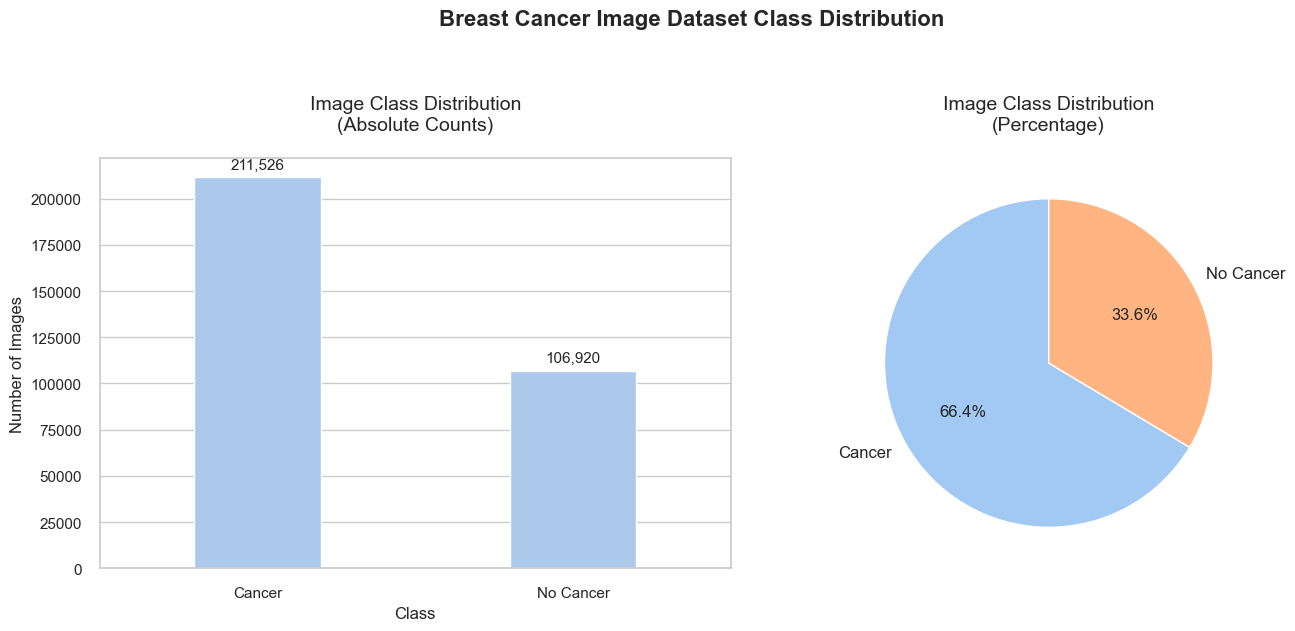

,Class,Count,Percentage
0,Cancer,"211,526",66.4%
1,No Cancer,"106,920",33.6%


In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display

# Configure paths
CANCER_PATH = '/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/preprocessed_data/cancer'
NO_CANCER_PATH = '/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/preprocessed_data/no_cancer'

# Set style for professional visualization - UPDATED STYLE HANDLING
try:
    plt.style.use('seaborn-v0_8')  # Newer matplotlib versions
except:
    plt.style.use('seaborn')  # Fallback for older versions
sns.set_theme(style="whitegrid", palette="pastel")

def count_images(folder_path):
    """Count image files in directory"""
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"Directory not found: {folder_path}")
    return len([name for name in os.listdir(folder_path) 
               if name.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff', '.bmp'))])

try:
    # Get counts
    cancer_count = count_images(CANCER_PATH)
    no_cancer_count = count_images(NO_CANCER_PATH)

    # Create DataFrame for visualization
    data = pd.DataFrame({
        'Class': ['Cancer', 'No Cancer'],
        'Count': [cancer_count, no_cancer_count],
        'Percentage': [
            cancer_count/(cancer_count+no_cancer_count)*100, 
            no_cancer_count/(cancer_count+no_cancer_count)*100
        ]
    })

    # Create figure with two subplots
    plt.figure(figsize=(14, 6))

    # Bar plot - Absolute counts
    plt.subplot(1, 2, 1)
    barplot = sns.barplot(x='Class', y='Count', data=data, width=0.4)
    plt.title('Image Class Distribution\n(Absolute Counts)', fontsize=14, pad=20)
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)

    # Add exact counts on bars
    for p in barplot.patches:
        barplot.annotate(f'{int(p.get_height()):,}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', 
                        xytext=(0, 9), 
                        textcoords='offset points',
                        fontsize=11)

    # Pie chart - Relative distribution
    plt.subplot(1, 2, 2)
    plt.pie(data['Count'], labels=data['Class'], 
            autopct='%1.1f%%', startangle=90,
            textprops={'fontsize': 12},
            wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    plt.title('Image Class Distribution\n(Percentage)', fontsize=14, pad=20)

    # Add overall title and adjust layout
    plt.suptitle('Breast Cancer Image Dataset Class Distribution', 
                 fontsize=16, y=1.05, fontweight='bold')
    plt.tight_layout()

    # Display imbalance ratio
    imbalance_ratio = no_cancer_count / cancer_count
    print(f"\nImbalance Ratio (No Cancer:Cancer) = {imbalance_ratio:.1f}:1")

    # Show the plot
    plt.show()

    # Display table with exact numbers
    display(data.style.format({'Count': '{:,}', 'Percentage': '{:.1f}%'})
                  .set_caption("Detailed Class Distribution")
                  .background_gradient(cmap='Blues', subset=['Count', 'Percentage']))

except FileNotFoundError as e:
    print(f"Error: {str(e)}")
    print("Please check your directory paths and try again.")
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

In [1]:
import os
import random
import shutil
from pathlib import Path
import time
from tqdm import tqdm

def fast_undersample_images(source_folder, target_count, delete_directly=False):
    """
    Fast undersample images with progress tracking.
    
    Args:
        source_folder (str): Path to the folder containing images to undersample
        target_count (int): Number of images to keep
        delete_directly (bool): If True, delete files instead of backing up (much faster)
    """
    
    # Convert to Path objects for easier handling
    source_path = Path(source_folder)
    
    print("📂 Scanning for image files...")
    start_time = time.time()
    
    # Get all image files (excluding hidden system files)
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif'}
    all_images = []
    
    for ext in image_extensions:
        all_images.extend(source_path.glob(f'*{ext}'))
        all_images.extend(source_path.glob(f'*{ext.upper()}'))
    
    # Filter out hidden system files and non-existent files
    print("🔍 Filtering valid images...")
    valid_images = [img for img in all_images if not img.name.startswith('._') and img.exists()]
    
    scan_time = time.time() - start_time
    print(f"✅ Found {len(valid_images)} valid images in {scan_time:.1f} seconds")
    
    if len(valid_images) <= target_count:
        print(f"✅ No undersampling needed. Current count ({len(valid_images)}) <= target ({target_count})")
        return
    
    # Randomly select images to keep
    print("🎲 Randomly selecting images to keep...")
    random.seed(42)  # For reproducibility
    images_to_keep = set(random.sample(valid_images, target_count))
    images_to_remove = [img for img in valid_images if img not in images_to_keep]
    
    print(f"📊 Will keep: {len(images_to_keep)} images")
    print(f"🗑️  Will remove: {len(images_to_remove)} images")
    
    # Process files with progress bar
    if delete_directly:
        print("⚡ Fast mode: Deleting files directly...")
        failed_count = 0
        
        with tqdm(total=len(images_to_remove), desc="Deleting", unit="files") as pbar:
            for img_path in images_to_remove:
                try:
                    if img_path.exists():
                        img_path.unlink()
                    pbar.update(1)
                except Exception as e:
                    failed_count += 1
                    if failed_count < 10:  # Only show first 10 errors
                        print(f"\n❌ Error deleting {img_path.name}: {e}")
        
        if failed_count > 0:
            print(f"⚠️  {failed_count} files failed to delete")
    
    else:
        # Backup mode (slower)
        backup_folder = source_path.parent / 'removed_cancer_images'
        backup_folder.mkdir(exist_ok=True)
        print(f"💾 Backing up to: {backup_folder}")
        
        failed_count = 0
        with tqdm(total=len(images_to_remove), desc="Moving to backup", unit="files") as pbar:
            for img_path in images_to_remove:
                try:
                    if img_path.exists():
                        shutil.move(str(img_path), str(backup_folder / img_path.name))
                    pbar.update(1)
                except Exception as e:
                    failed_count += 1
                    # Try to delete if move fails
                    try:
                        if img_path.exists():
                            img_path.unlink()
                    except:
                        pass
                    if failed_count < 10:
                        print(f"\n❌ Error moving {img_path.name}: {e}")
        
        if failed_count > 0:
            print(f"⚠️  {failed_count} files failed to move (deleted instead)")
    
    # Verify final count
    print("🔍 Verifying final count...")
    remaining_images = [img for img in source_path.glob('*') 
                       if img.suffix.lower() in {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif'} 
                       and not img.name.startswith('._') and img.exists()]
    
    total_time = time.time() - start_time
    print(f"✅ Final count: {len(remaining_images)} images")
    print(f"⏱️  Total time: {total_time/60:.1f} minutes")
    
    return len(remaining_images)

def main():
    print("🚀 Fast Undersampling Tool")
    print("=" * 50)
    
    # Define paths
    cancer_folder = '/Volumes/KODAK/folder 02/Brest_cancer_prediction/data/preprocessed_data/cancer'
    target_count = 106920
    
    # Ask user for processing mode
    print("Choose processing mode:")
    print("1. FAST MODE: Delete excess files directly (⚡ Much faster)")
    print("2. SAFE MODE: Move files to backup folder (💾 Slower but recoverable)")
    
    try:
        choice = input("Enter choice (1 or 2): ").strip()
        delete_directly = choice == "1"
        
        if delete_directly:
            confirm = input("⚠️  Are you sure you want to DELETE files permanently? (yes/no): ").lower()
            if confirm != 'yes':
                print("❌ Operation cancelled")
                return
    except:
        print("Using safe mode by default...")
        delete_directly = False
    
    # Check if folder exists
    if not os.path.exists(cancer_folder):
        print(f"❌ Cancer folder not found at {cancer_folder}")
        return
    
    print(f"🎯 Target count: {target_count:,}")
    print(f"📁 Processing: {cancer_folder}")
    print("-" * 50)
    
    # Perform undersampling
    try:
        final_count = fast_undersample_images(cancer_folder, target_count, delete_directly)
        
        if final_count == target_count:
            print("🎉 SUCCESS: Dataset is now perfectly balanced!")
        else:
            print(f"⚠️  Final count ({final_count}) doesn't match target ({target_count})")
            
    except KeyboardInterrupt:
        print("\n⏸️  Process interrupted by user")
    except Exception as e:
        print(f"❌ Error: {e}")

if __name__ == "__main__":
    main()

🚀 Fast Undersampling Tool
Choose processing mode:
1. FAST MODE: Delete excess files directly (⚡ Much faster)
2. SAFE MODE: Move files to backup folder (💾 Slower but recoverable)
🎯 Target count: 106,920
📁 Processing: /Volumes/KODAK/folder 02/Brest_cancer_prediction/data/preprocessed_data/cancer
--------------------------------------------------
📂 Scanning for image files...
🔍 Filtering valid images...

⏸️  Process interrupted by user
